
Welcome to the Decision Tree workbook. Let's start by importing some of our custom libraries.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

Now let's import our "fancier" libraries.

In [2]:
from sklearn.tree import DecisionTreeRegressor

In [3]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import Image

Let's start by creating a noisy sine wave like we did with Regression

In [4]:
x = np.linspace(0, 2*np.pi, 100)

In [5]:
# noise
np.random.seed(321)
noise = np.random.normal(0, .5, 100)

In [6]:
# target variable
y = np.sin(x) + noise

Saving the new values into a dataframe.

In [7]:
# Create DataFrame with x and y
df = pd.DataFrame({'x' : x, 'y': y})
df.head()

,x,y
0,0.000000,0.086260
1,0.063467,0.881165
2,0.126933,0.145261
3,0.190400,-0.252824
4,0.253866,-0.320448


In [8]:
# Splits input features from target variable
features = df.drop('y', axis=1)
target = df.y

Now we can create an unconstrained decision tree model.

In [9]:
# Unconstrained Decision Tree
dt_model = DecisionTreeRegressor()

In [10]:
# Fit model
dt_model.fit(features, target)

DecisionTreeRegressor()

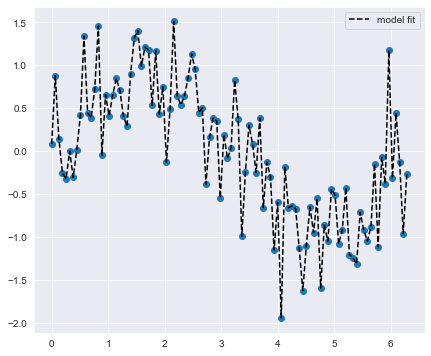

In [11]:
fig = plt.figure(figsize=[7,6])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df.x, df.y)
# Plot predicted values of y
ax.plot(df.x, dt_model.predict(features), 'k--', label='model fit')
ax.legend(loc=1)
plt.show()    


In case you had trouble downloading graphviz, you can omit the following steps. 

In [12]:
# Export tree structure and save to Source object
graph = Source( export_graphviz(dt_model, out_file=None) )

In [13]:
tree_png = graph.pipe(format='png')

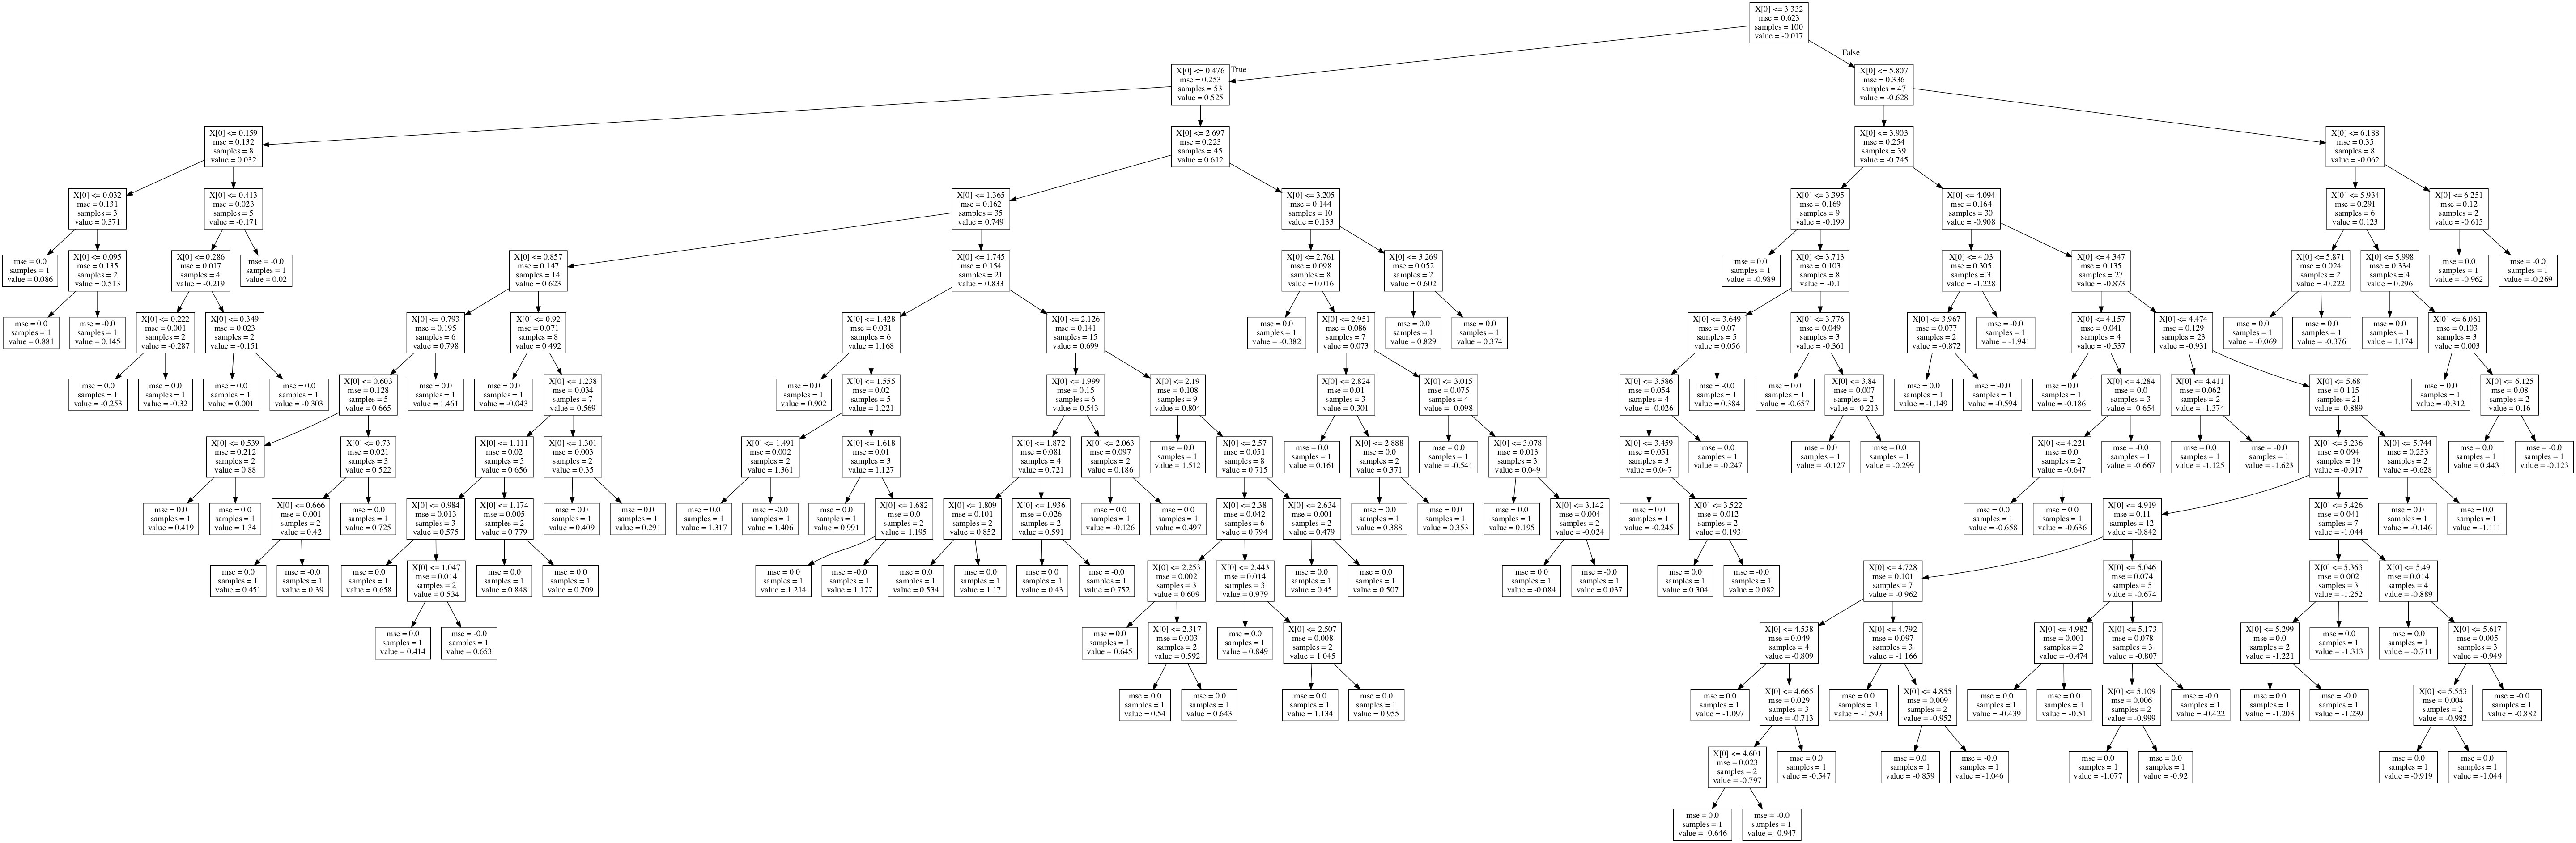

In [14]:
Image(tree_png)

Let's see if this is a good fit.

In [15]:
# Total number of leaf nodes
print(np.sum(dt_model.tree_.children_left == -1))
print(np.sum(dt_model.tree_.children_right == -1))

100
100


## Constrained Decision Trees

### Min samples per leaf
Let's explore how to constrain a decision tree by limiting the amount of samples that we can have in a leaf.

In [16]:
dt_model2 = DecisionTreeRegressor(min_samples_leaf = 10)

In [17]:
# Fit model
dt_model2.fit(features, target)

DecisionTreeRegressor(min_samples_leaf=10)

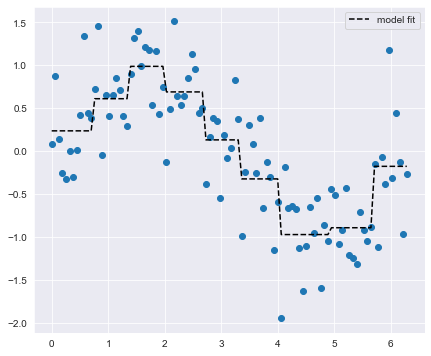

In [18]:
fig = plt.figure(figsize=[7,6])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df.x, df.y)
# Plot predicted values of y
ax.plot(df.x, dt_model2.predict(features), 'k--', label='model fit')
ax.legend(loc=1)
plt.show()    

In [19]:
# Export tree structure and save to Source object`
graph = Source( export_graphviz(dt_model2, filled=True, out_file=None) )

In [20]:
tree_png = graph.pipe(format='png')

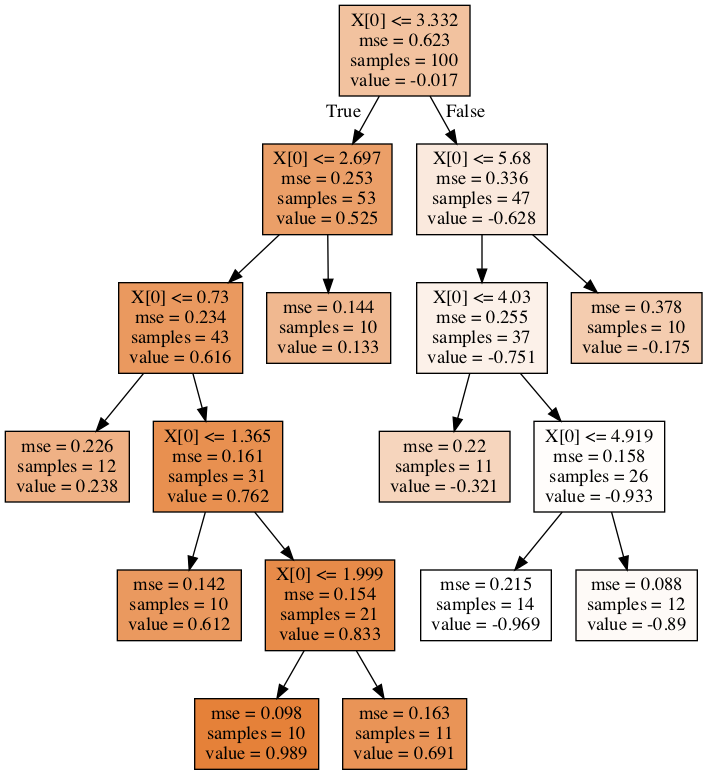

In [21]:
Image(tree_png)

Is this a good fit?

In [22]:
# Total number of leaf nodes
print(np.sum(dt_model2.tree_.children_left == -1))
print(np.sum(dt_model2.tree_.children_right == -1))

9
9


In [23]:
dt_model2.tree_.node_count

17

In [24]:
dt_model2.tree_.children_left

array([ 1,  2,  3, -1,  5, -1,  7, -1, -1, -1, 11, 12, -1, 14, -1, -1, -1])

### Maximum depth
Here is another way to constrain a decision tree.

In [25]:
dt_model3 = DecisionTreeRegressor(max_depth=4)

In [26]:
# Fit model
dt_model3.fit(features, target)

DecisionTreeRegressor(max_depth=4)

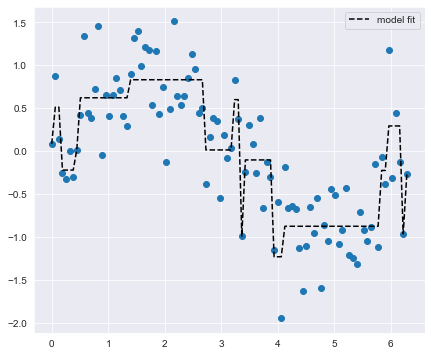

In [27]:
fig = plt.figure(figsize=[7,6])

ax = plt.subplot(111)
# Plot original points
ax.scatter(df.x, df.y)
# Plot predicted values of y
ax.plot(df.x, dt_model3.predict(features), 'k--', label='model fit')
ax.legend(loc=1)
plt.show()    


In [28]:
# Export tree structure and save to Source object`
graph = Source( export_graphviz(dt_model3, out_file=None) )

In [29]:
tree_png = graph.pipe(format='png')

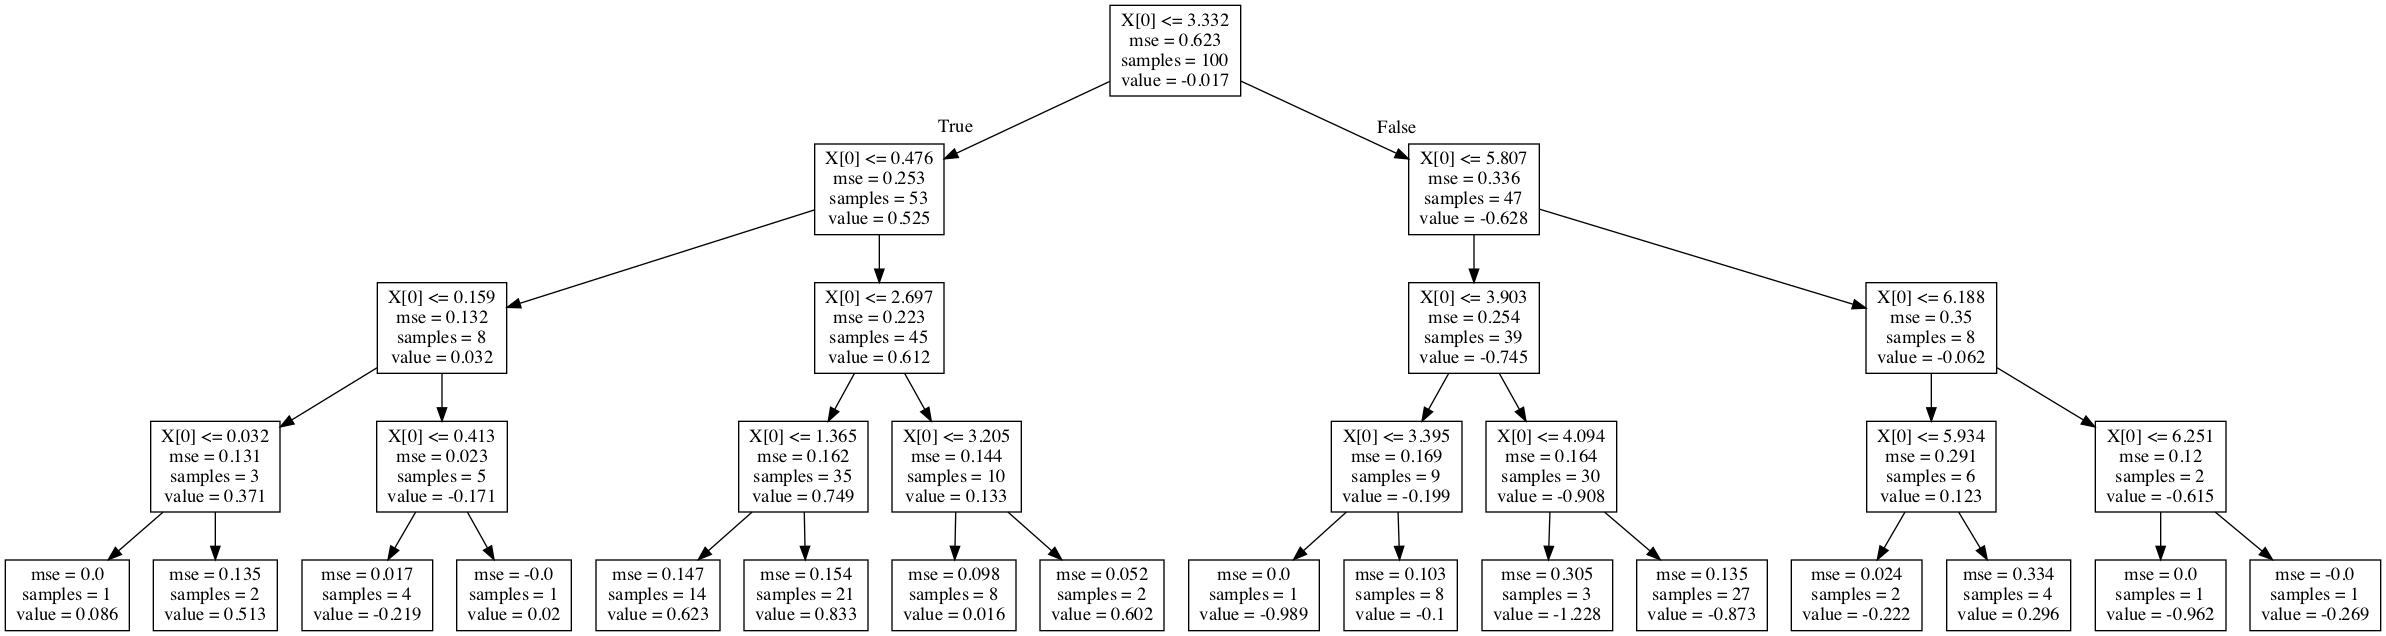

In [36]:
Image(tree_png)

How about this fit?

In [38]:
# Total number of leaf nodes
print(np.sum(dt_model3.tree_.children_left == -1))
print(np.sum(dt_model3.tree_.children_right == -1))

16
16


In [39]:
dt_model3.tree_.node_count

31

What can we say about depth vs samples for this example?

## Random Forest
Random forests are ensemble models of decision trees. Let's start by importing our library.

In [30]:
from sklearn.ensemble import RandomForestRegressor

Random forests need randomness, let's set the random_state to 123.

In [31]:
rf =  RandomForestRegressor(random_state=123)

In [32]:
# Fit the model.
rf.fit(features, target)

RandomForestRegressor(random_state=123)

In [38]:
# Number of decision trees in the random forest
print(len(rf.estimators_))

# Display first decision tree
print(rf.estimators_[60])

100
DecisionTreeRegressor(max_features='auto', random_state=395587690)


Let's plot the results.

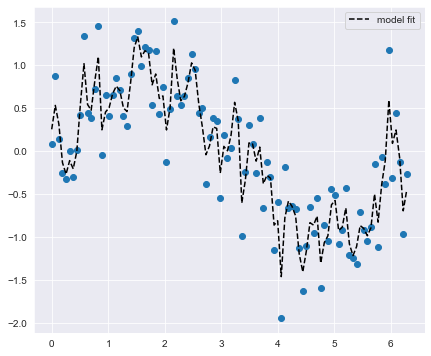

In [39]:
fig = plt.figure(figsize=[7,6])

ax = plt.subplot(111)
ax.scatter(df.x, df.y)
ax.plot(df.x, rf.predict(features), 'k--', label='model fit')
ax.legend(loc=1)
plt.show()    

In [40]:
graph1 = Source( export_graphviz(rf.estimators_[0], out_file=None) )

In [41]:
tree_png1 = graph1.pipe(format='png')

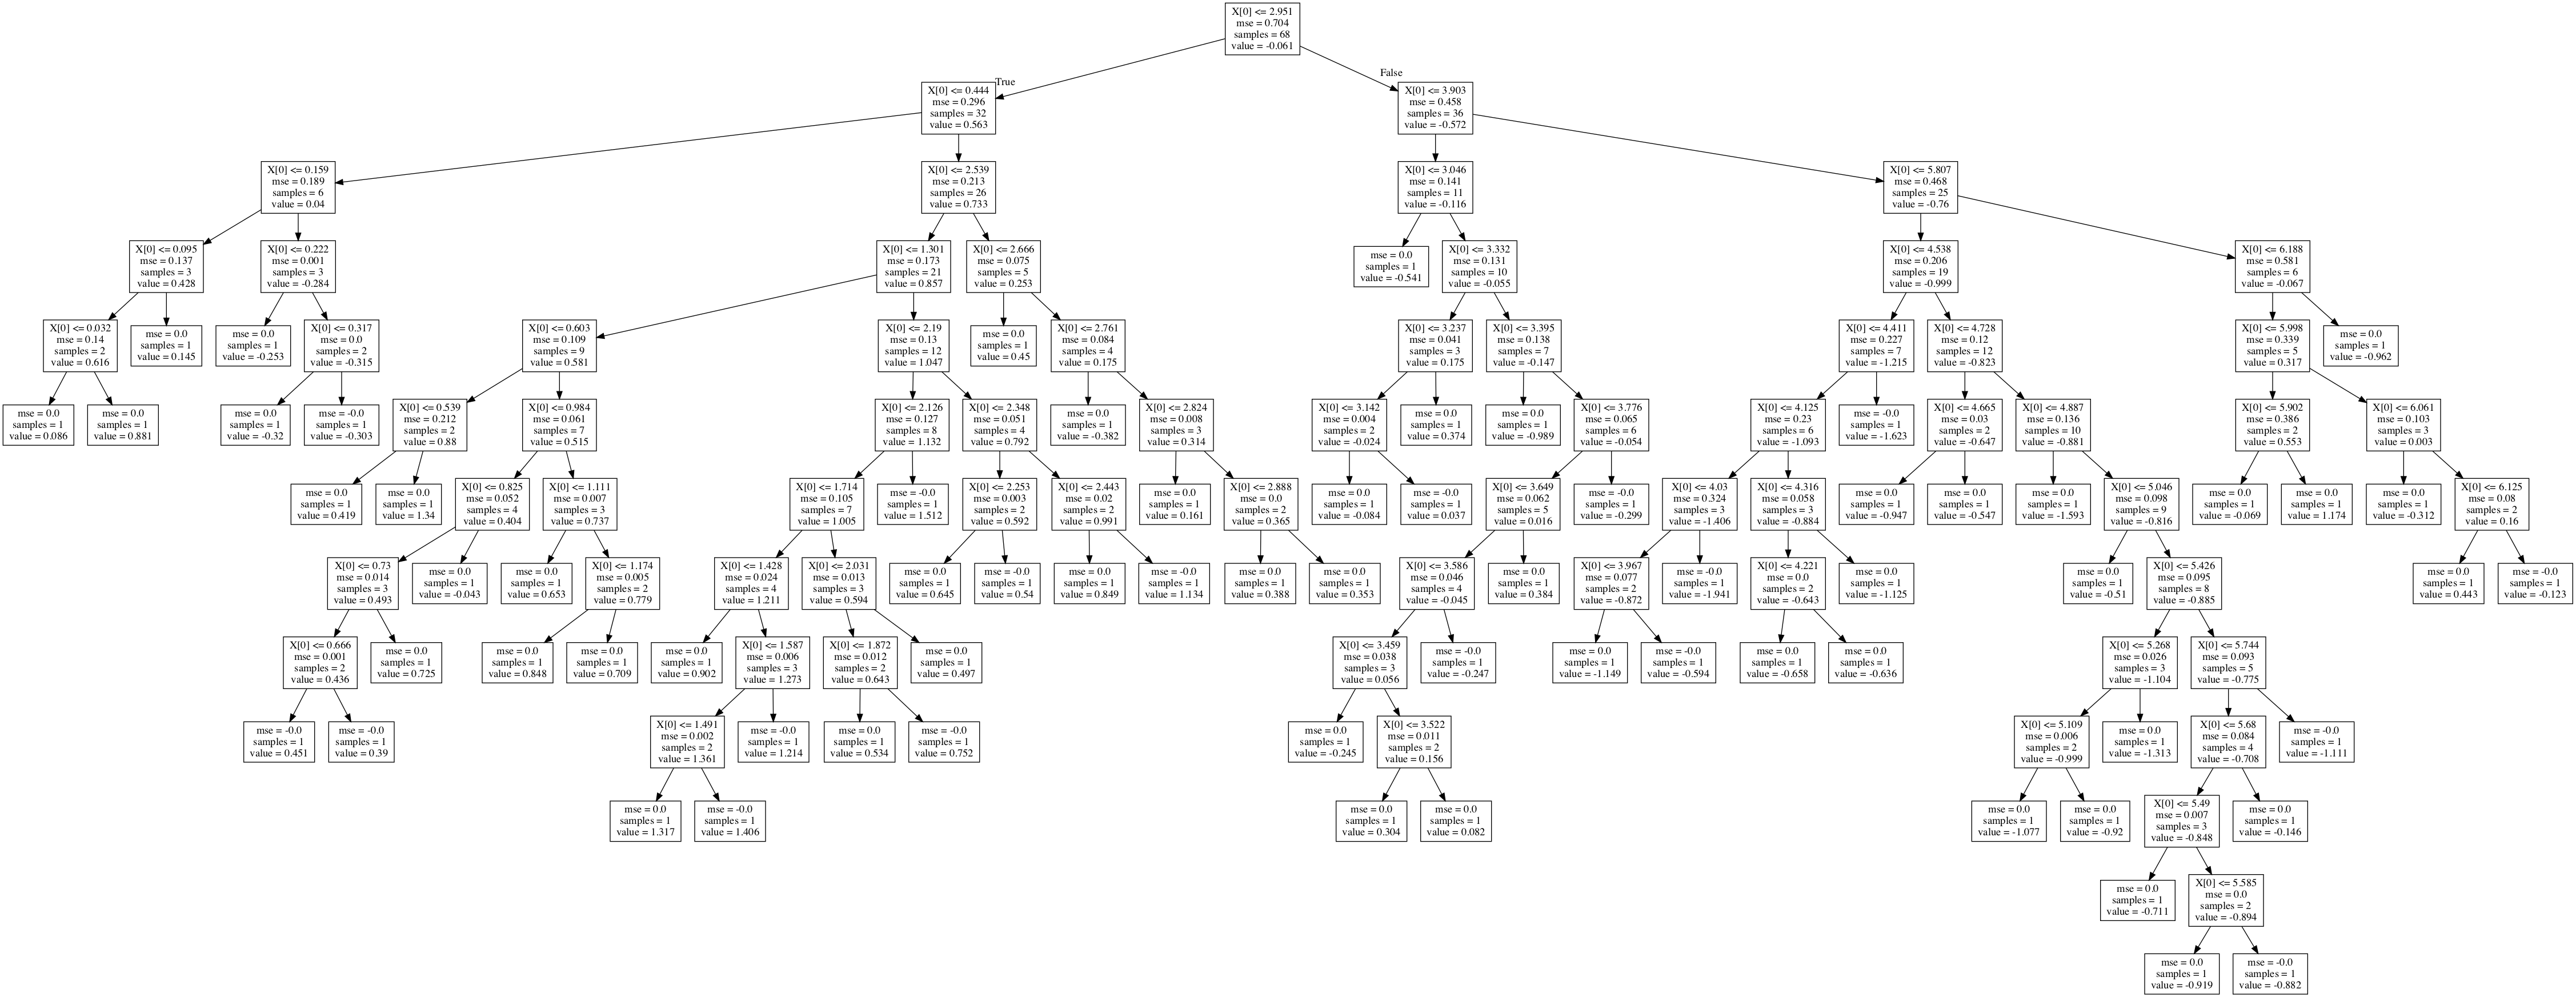

In [42]:
Image(tree_png1)

In [43]:
graph2 = Source( export_graphviz(rf.estimators_[70], out_file=None) )

In [44]:
tree_png2 = graph2.pipe(format='png')

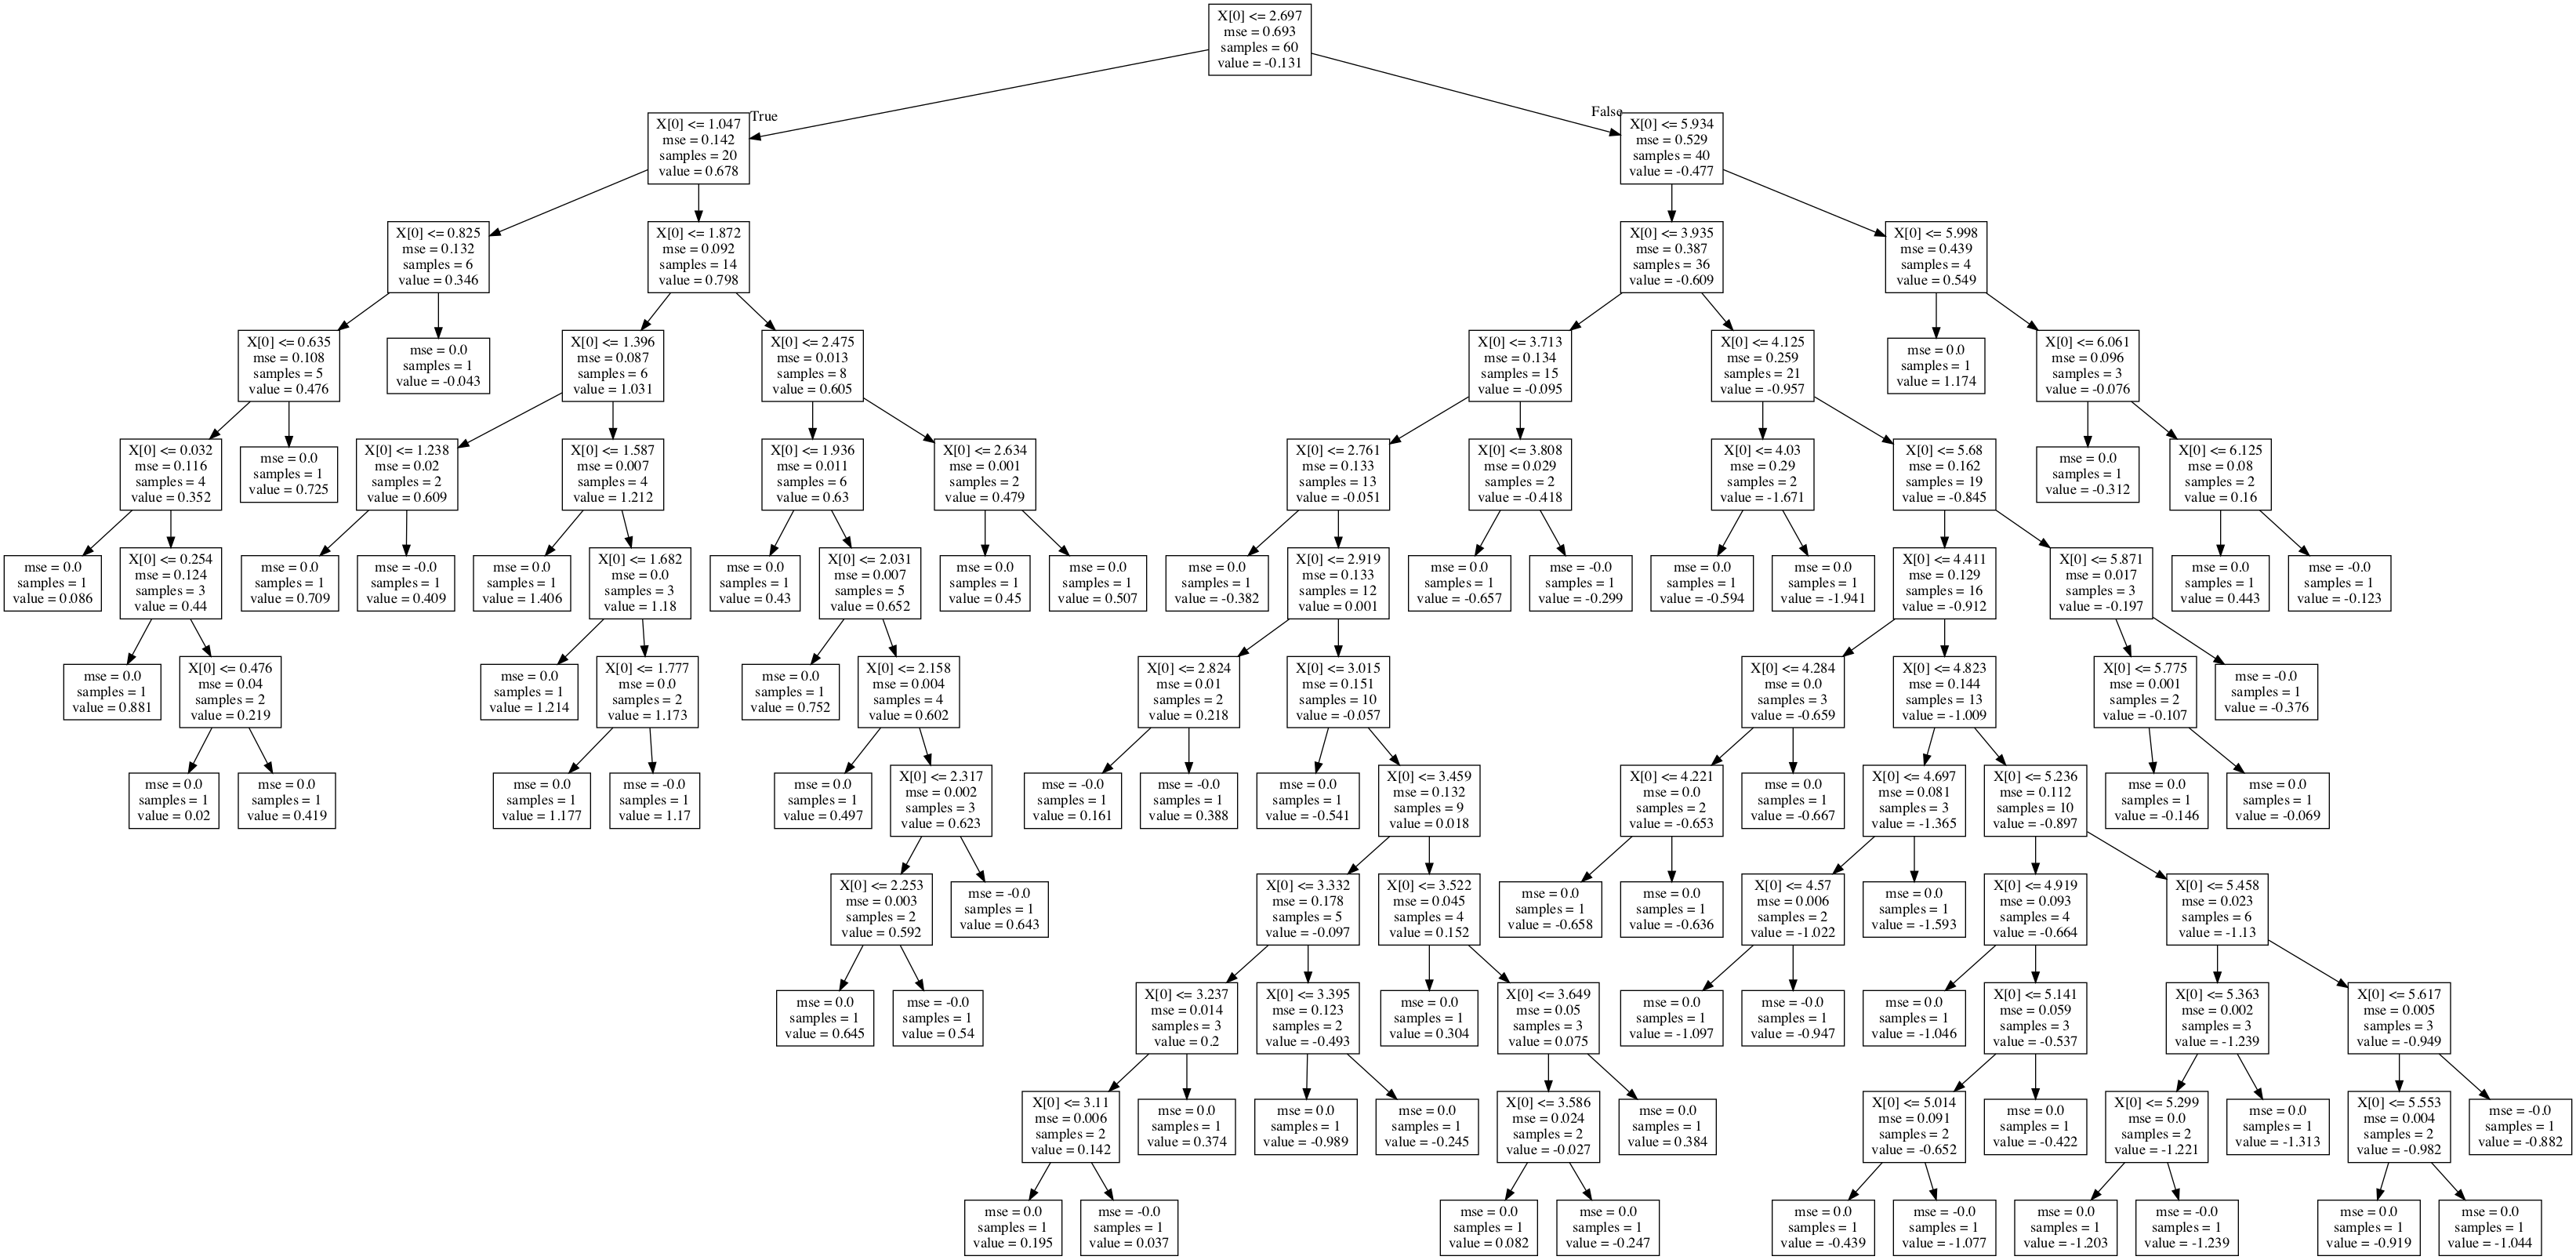

In [45]:
Image(tree_png2)

👏 Congratulations, you have completed the Decision Tree Workbook!